<a href="https://colab.research.google.com/github/shruthad/Medical-Image-segmentation/blob/main/Medical_image_segmentation(HRnet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy

In [3]:
X_train= []
Y_train=[]

X_test=[]
Y_test=[]
for k in range(84):
  
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}_anno.bmp'))
for i in range(21,59):
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}_anno.bmp'))

In [4]:

for k in range(20):
  
    X_test.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}.bmp'))
    Y_test.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}_anno.bmp'))

In [ ]:
len(X_test)

20

In [ ]:
for i in range(20):
  print(numpy.unique(Y_test[i]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1 2 3 4 5]


In [ ]:
X_train[0].shape

(522, 775, 3)

In [ ]:
import cv2
im_size=512
in_size=768

inp=[]

for img in X_train:
   new_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
   b,g,r = cv2.split(new_image)
   #gray = 0.2125*r + 0.7154*g + 0.0721*b
   smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   unsharped = cv2.addWeighted(new_image, 1.5, smoothed, -0.5, 0)
   
   
   image = cv2.resize(unsharped, (in_size,im_size))
   inp.append(image)
   

In [ ]:
import cv2
im_size=512
in_size=768

out=[]

for img in Y_train:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   out.append(new_image)

In [ ]:
for i in range(122):
  for j in out[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [ ]:
out[1].shape

(512, 768)

In [ ]:
import numpy as np
Out=[]
for img in out:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   Out.append(backtorgb)

In [ ]:
Out[1].shape

(512, 768, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


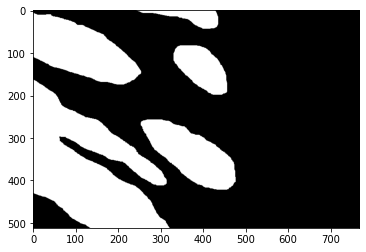

In [ ]:
plt.imshow(Out[1])

In [ ]:
len(Out)

122

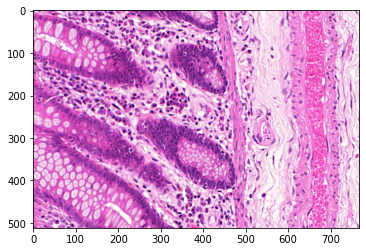

In [ ]:
plt.imshow(inp[1])

In [5]:
import cv2
im_size=512
in_size=768

testin=[]

for img in X_test:
   new_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   #b,g,r = cv2.split(new_image)
   smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   unsharped = cv2.addWeighted(new_image, 1.5, smoothed, -0.5, 0)
   
   image = cv2.resize(unsharped, (in_size,im_size))
   testin.append(image)

In [6]:
import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testout.append(new_image)

In [7]:
for i in range(20):
  for j in testout[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [8]:
import numpy as np
testOut=[]
for img in testout:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testOut.append(backtorgb)

In [ ]:
#dont run
import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   retuval,BW=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   ImgUMat = np.float32(BW)
   Backtorgb=cv2.cvtColor(ImgUMat,cv2.COLOR_GRAY2RGB)
   
   new_image = cv2.resize(Backtorgb,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   
   testout.append(new_image)

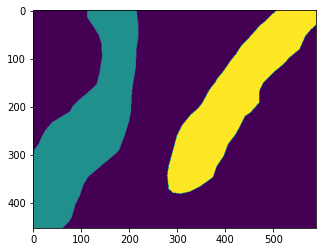

In [ ]:
plt.imshow(Y_test[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


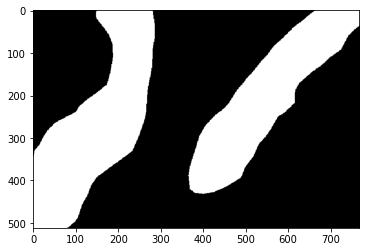

In [ ]:
plt.imshow(testOut[1])

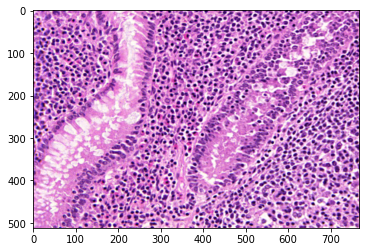

In [ ]:
plt.imshow(testin[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


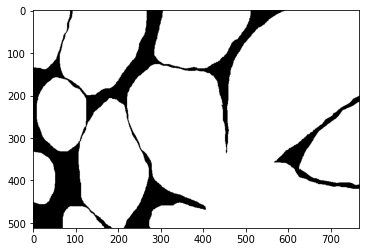

In [ ]:
plt.imshow(testOut[0])

In [ ]:
Y_test[0]

array([[1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7]], dtype=uint8)

In [ ]:
testOut[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [ ]:
imagepatches=[]
for i,imag in enumerate(inp):
  
  ti_1=imag[0:256,0:256]
  imagepatches.append(ti_1)

  ti_2=imag[0:256,256:512]
  imagepatches.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  imagepatches.append(ti_3)

  ti_4=imag[256:512,0:256]
  imagepatches.append(ti_4)

  ti_5=imag[256:512,256:512]
  imagepatches.append(ti_5)

  ti_6=imag[256:512,512:768]
  imagepatches.append(ti_6)

In [ ]:
maskpatches=[]
for j,msk in enumerate(Out):
  
  tj_1=msk[0:256,0:256]
  maskpatches.append(tj_1)

  tj_2=msk[0:256,256:512]
  maskpatches.append(tj_2)
  
  tj_3=msk[0:256,512:768]
  maskpatches.append(tj_3)

  tj_4=msk[256:512,0:256]
  maskpatches.append(tj_4)

  tj_5=msk[256:512,256:512]
  maskpatches.append(tj_5)

  tj_6=msk[256:512,512:768]
  maskpatches.append(tj_6)

In [ ]:
len(imagepatches)

732

In [ ]:
import numpy
x_train =numpy.array(imagepatches)
y_train=numpy.array(maskpatches)

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import *
from keras import backend as K
import sklearn
from sklearn.model_selection import KFold

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
 def recall_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall

def precision_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision

def f1_m(y_true, y_pred):
      precision = precision_m(y_true, y_pred)
      recall = recall_m(y_true, y_pred)
      return 2*((precision*recall)/(precision+recall+K.epsilon()))
def iou(y_true, y_pred, smooth = 100):
      intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
      sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
      jac = (intersection + smooth) / (sum_ - intersection + smooth)
      return jac

def dice_coef(y_true, y_pred, smooth = 100):
      y_true_f = K.flatten(y_true)
      y_pred_f = K.flatten(y_pred)
      intersection = K.sum(y_true_f * y_pred_f)
      return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [ ]:
BatchSize = 1
NumChannels = 3
ImgHeight = 256
ImgWidth = 256
NumClass = 2

# training params
#GPUs = '0, 1, 2, 3'
#os.environ["CUDA_VISIBLE_DEVICES"] = GPUs
Optimizer = 'Adam'  # SGD(lr=0.01, momentum=0.9, nesterov=True)
Loss = 'bianry_crossentropy'
Metrics = ['accuracy', iou]
NumEpochs = 30
Patience = 10

# data params
#TrainImageDir = '/data/dh_zhu/cong/AerialImageDataset/train/images/'
#ValImageDir = '/data/dh_zhu/cong/AerialImageDataset/val/images/'

# visualization params
metric_list = ['acc', 'iou']

In [ ]:

import keras.backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation
from keras.layers import UpSampling2D, add, concatenate


def conv3x3(x, out_filters, strides=(1, 1)):
    x = Conv2D(out_filters, 3, padding='same', strides=strides, use_bias=False, kernel_initializer='he_normal')(x)
    return x


def basic_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    x = conv3x3(input, out_filters, strides)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = conv3x3(x, out_filters)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def bottleneck_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    expansion = 4
    de_filters = int(out_filters / expansion)

    x = Conv2D(de_filters, 1, use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(de_filters, 3, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(out_filters, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def stem_net(input):
    x = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    # x = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    # x = BatchNormalization(axis=3)(x)
    # x = Activation('relu')(x)

    x = bottleneck_Block(x, 256, with_conv_shortcut=True)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)
    x = bottleneck_Block(x, 256, with_conv_shortcut=False)

    return x


def transition_layer1(x, out_filters_list=[32, 64]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x)
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    return [x0, x1]


def make_branch1_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch1_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer1(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0 = add([x0_0, x0_1])

    x1_0 = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x1_0 = BatchNormalization(axis=3)(x1_0)
    x1_1 = x[1]
    x1 = add([x1_0, x1_1])
    return [x0, x1]


def transition_layer2(x, out_filters_list=[32, 64, 128]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(out_filters_list[2], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x2 = BatchNormalization(axis=3)(x2)
    x2 = Activation('relu')(x2)

    return [x0, x1, x2]


def make_branch2_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch2_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch2_2(x, out_filters=128):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer2(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0_2 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x0_2 = BatchNormalization(axis=3)(x0_2)
    x0_2 = UpSampling2D(size=(4, 4))(x0_2)
    x0 = add([x0_0, x0_1, x0_2])

    x1_0 = Conv2D(64, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x1_0 = BatchNormalization(axis=3)(x1_0)
    x1_1 = x[1]
    x1_2 = Conv2D(64, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x1_2 = BatchNormalization(axis=3)(x1_2)
    x1_2 = UpSampling2D(size=(2, 2))(x1_2)
    x1 = add([x1_0, x1_1, x1_2])

    x2_0 = Conv2D(32, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x2_0 = BatchNormalization(axis=3)(x2_0)
    x2_0 = Activation('relu')(x2_0)
    x2_0 = Conv2D(128, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x2_0)
    x2_0 = BatchNormalization(axis=3)(x2_0)
    x2_1 = Conv2D(128, 3, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x2_1 = BatchNormalization(axis=3)(x2_1)
    x2_2 = x[2]
    x2 = add([x2_0, x2_1, x2_2])
    return [x0, x1, x2]


def transition_layer3(x, out_filters_list=[32, 64, 128, 256]):
    x0 = Conv2D(out_filters_list[0], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[0])
    x0 = BatchNormalization(axis=3)(x0)
    x0 = Activation('relu')(x0)

    x1 = Conv2D(out_filters_list[1], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[1])
    x1 = BatchNormalization(axis=3)(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(out_filters_list[2], 3, padding='same', use_bias=False, kernel_initializer='he_normal')(x[2])
    x2 = BatchNormalization(axis=3)(x2)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(out_filters_list[3], 3, strides=(2, 2),
                padding='same', use_bias=False, kernel_initializer='he_normal')(x[2])
    x3 = BatchNormalization(axis=3)(x3)
    x3 = Activation('relu')(x3)

    return [x0, x1, x2, x3]


def make_branch3_0(x, out_filters=32):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_1(x, out_filters=64):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_2(x, out_filters=128):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def make_branch3_3(x, out_filters=256):
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    x = basic_Block(x, out_filters, with_conv_shortcut=False)
    return x


def fuse_layer3(x):
    x0_0 = x[0]
    x0_1 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[1])
    x0_1 = BatchNormalization(axis=3)(x0_1)
    x0_1 = UpSampling2D(size=(2, 2))(x0_1)
    x0_2 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[2])
    x0_2 = BatchNormalization(axis=3)(x0_2)
    x0_2 = UpSampling2D(size=(4, 4))(x0_2)
    x0_3 = Conv2D(32, 1, use_bias=False, kernel_initializer='he_normal')(x[3])
    x0_3 = BatchNormalization(axis=3)(x0_3)
    x0_3 = UpSampling2D(size=(8, 8))(x0_3)
    x0 = concatenate([x0_0, x0_1, x0_2, x0_3], axis=-1)
    return x0


def final_layer(x, classes=1):
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(classes, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('softmax', name='Classification')(x)
    return x


def seg_hrnet(batch_size, height, width, channel, classes):
    inputs = Input(batch_shape=(batch_size,) + (height, width, channel))

    x = stem_net(inputs)

    x = transition_layer1(x)
    x0 = make_branch1_0(x[0])
    x1 = make_branch1_1(x[1])
    x = fuse_layer1([x0, x1])

    x = transition_layer2(x)
    x0 = make_branch2_0(x[0])
    x1 = make_branch2_1(x[1])
    x2 = make_branch2_2(x[2])
    x = fuse_layer2([x0, x1, x2])

    x = transition_layer3(x)
    x0 = make_branch3_0(x[0])
    x1 = make_branch3_1(x[1])
    x2 = make_branch3_2(x[2])
    x3 = make_branch3_3(x[3])
    x = fuse_layer3([x0, x1, x2, x3])

    out = final_layer(x, classes=classes)

    model = Model(inputs=inputs, outputs=out)

    return model

In [ ]:

model = seg_hrnet(BatchSize, ImgHeight, ImgWidth, NumChannels, NumClass)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (1, 256, 256, 3)     0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (1, 128, 128, 64)    1728        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_109 (BatchN (1, 128, 128, 64)    256         conv2d_109[0][0]                 
__________________________________________________________________________________________________
activation_96 (Activation)      (1, 128, 128, 64)    0           batch_normalization_109[0][0]    
____________________________________________________________________________________________

In [ ]:
 model.compile(optimizer = Adam(lr = 0.001), loss ='binary_crossentropy', metrics = ['accuracy',precision_m, recall_m,f1_m,iou,dice_coef])

In [ ]:


color_dict = {0: (0., 0., 0.),          
              1: (255., 255., 255.)}         


def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    trainy_hot = []
    for i in range(y_train.shape[0]):
        hot_img = rgb_to_onehot(y_train[i], color_dict)
        trainy_hot.append(hot_img)
    trainy_hot = np.asarray(trainy_hot)
    return trainy_hot

trainyhot = conv_to_onehot()


n_folds=5
kfold = KFold(n_folds, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(x_train):
   x_Train, y_Train, x_Test, y_Test = x_train[train_ix], trainyhot[train_ix], x_train[test_ix], trainyhot[test_ix]
   history = model.fit(x_Train, y_Train, epochs= 40, batch_size=1, validation_data=(x_Test, y_Test), verbose=1)
   acc = model.evaluate(x_Test, y_Test, verbose=1)
   print(acc)

model.save("/content/drive/MyDrive/hrnetkfold.h5")


Train on 585 samples, validate on 147 samples
Epoch 1/40
585/585 [==============================] - 81s 139ms/step - loss: 0.5571 - accuracy: 0.7279 - precision_m: 0.7279 - recall_m: 0.7279 - f1_m: 0.7279 - iou: 0.9963 - dice_coef: 0.6272 - val_loss: 0.8189 - val_accuracy: 0.7098 - val_precision_m: 0.7098 - val_recall_m: 0.7098 - val_f1_m: 0.7098 - val_iou: 0.9956 - val_dice_coef: 0.6790
Epoch 2/40
585/585 [==============================] - 64s 110ms/step - loss: 0.4970 - accuracy: 0.7741 - precision_m: 0.7741 - recall_m: 0.7741 - f1_m: 0.7741 - iou: 0.9968 - dice_coef: 0.6725 - val_loss: 0.9253 - val_accuracy: 0.6516 - val_precision_m: 0.6516 - val_recall_m: 0.6516 - val_f1_m: 0.6516 - val_iou: 0.9947 - val_dice_coef: 0.6427
Epoch 3/40
585/585 [==============================] - 64s 110ms/step - loss: 0.4549 - accuracy: 0.7991 - precision_m: 0.7991 - recall_m: 0.7991 - f1_m: 0.7991 - iou: 0.9971 - dice_coef: 0.6946 - val_loss: 0.5655 - val_accuracy: 0.7110 - val_precision_m: 0.7110 - v

In [ ]:
trainyhot.shape


(732, 256, 256, 2)

In [ ]:
y_train.shape

(732, 256, 256, 3)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/hrnet.h5')

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (1, 256, 256, 3)     0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (1, 128, 128, 64)    1728        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_109 (BatchN (1, 128, 128, 64)    256         conv2d_109[0][0]                 
__________________________________________________________________________________________________
activation_96 (Activation)      (1, 128, 128, 64)    0           batch_normalization_109[0][0]    
____________________________________________________________________________________________

In [10]:
test=[]
for i,imag in enumerate(testin):
  
  ti_1=imag[0:256,0:256]
  test.append(ti_1)

  ti_2=imag[0:256,256:512]
  test.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  test.append(ti_3)

  ti_4=imag[256:512,0:256]
  test.append(ti_4)

  ti_5=imag[256:512,256:512]
  test.append(ti_5)

  ti_6=imag[256:512,512:768]
  test.append(ti_6)

In [11]:

testm=[]
for i,imag in enumerate(testOut):
  
  ti_1=imag[0:256,0:256]
  testm.append(ti_1)

  ti_2=imag[0:256,256:512]
  testm.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  testm.append(ti_3)

  ti_4=imag[256:512,0:256]
  testm.append(ti_4)

  ti_5=imag[256:512,256:512]
  testm.append(ti_5)

  ti_6=imag[256:512,512:768]
  testm.append(ti_6)

In [ ]:
color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)}   
def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    testy_hot = []
    for i in range(y_test.shape[0]):
        hot_img = rgb_to_onehot(y_test[i], color_dict)
        testy_hot.append(hot_img)
    testy_hot = np.asarray(testy_hot)
    return testy_hot

In [ ]:
import numpy
x_test =numpy.array(test)
y_test=numpy.array(testm)

In [ ]:
testhot = conv_to_onehot()

In [ ]:
acc=model.evaluate(x_test,testhot,verbose=1)


120/120 [==============================] - 4s 31ms/step


In [ ]:
acc

[0.4831931432088216,
 0.8337690830230713,
 0.8365345597267151,
 0.8365345597267151,
 0.8365345001220703,
 0.9974475502967834,
 0.814391016960144]

In [ ]:
y_pred=[]
y_pred=model.predict(x_test)

In [ ]:
len(y_pred)

120

In [ ]:
y_pred[0].shape

(256, 256, 2)

In [ ]:
Color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)} 
def onehot_to_rgb(onehot, Color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in Color_dict.keys():
        output[single_layer==k] = Color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def onehot_to_conv():
    out = []
    for i in range(y_pred.shape[0]):
        hot_img = onehot_to_rgb(y_pred[i], Color_dict)
        out.append(hot_img)
    out = np.asarray(out)
    return out

In [ ]:
output=onehot_to_conv()

In [ ]:
len(output)

120

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


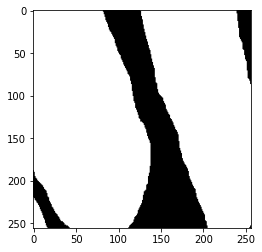

In [ ]:
plt.imshow(testm[116])


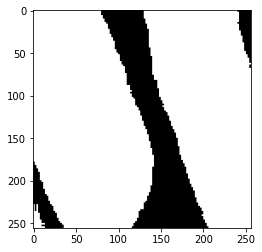

In [ ]:
plt.imshow(output[116])

In [ ]:
print(numpy.unique(output[54]))

[  0 255]


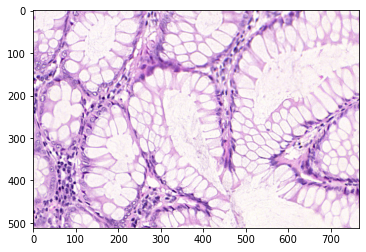

In [ ]:
plt.imshow(testin[0])

<Figure size 432x288 with 0 Axes>

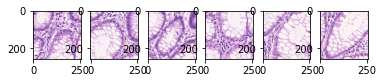

In [14]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=48

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(test[k+0])
axarr[1].imshow(test[k+1])
axarr[2].imshow(test[k+2])
axarr[3].imshow(test[k+3])
axarr[4].imshow(test[k+4])
axarr[5].imshow(test[k+5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

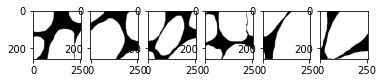

In [13]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=48

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(testm[k+0])
axarr[1].imshow(testm[k+1])
axarr[2].imshow(testm[k+2])
axarr[3].imshow(testm[k+3])
axarr[4].imshow(testm[k+4])
axarr[5].imshow(testm[k+5])

<Figure size 432x288 with 0 Axes>

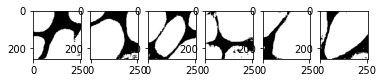

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=48
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(output[k+0])
axarr[1].imshow(output[k+1])
axarr[2].imshow(output[k+2])
axarr[3].imshow(output[k+3])
axarr[4].imshow(output[k+4])
axarr[5].imshow(output[k+5])

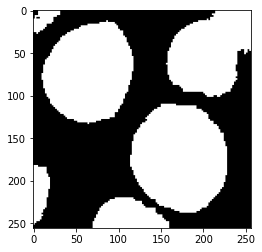

In [ ]:
plt.imshow(output[54])

In [ ]:
for i in range(59):
  print(numpy.unique(output[i]))

[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
